In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import scipy
import string
import warnings
import pickle
import os

from pgmpy.models import BayesianModel
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import HillClimbSearch,BicScore
import networkx as nx

### function - get body part location for each pair of cameras

In [2]:
from ana_functions.body_part_locs_eachpair import body_part_locs_eachpair
from ana_functions.body_part_locs_singlecam import body_part_locs_singlecam

### function - align the two cameras

In [3]:
from ana_functions.camera_align import camera_align       

### function - merge the two pairs of cameras

In [4]:
from ana_functions.camera_merge import camera_merge

### function - find social gaze time point

In [5]:
from ana_functions.find_socialgaze_timepoint import find_socialgaze_timepoint
from ana_functions.find_socialgaze_timepoint_singlecam import find_socialgaze_timepoint_singlecam

### function - define time point of behavioral events

In [6]:
from ana_functions.bhv_events_timepoint import bhv_events_timepoint
from ana_functions.bhv_events_timepoint_singlecam import bhv_events_timepoint_singlecam

### function - plot behavioral events

In [7]:
# from ana_functions.plot_bhv_event import plot_bhv_events
from ana_functions.plot_bhv_events_gaze_start_stop import plot_bhv_events_gaze_start_stop

### function - plot inter-pull interval

In [8]:
from ana_functions.plot_interpull_interval import plot_interpull_interval

### function - make demo videos with skeleton and inportant vectors

In [9]:
from ana_functions.tracking_video_singlecam_demo import tracking_video_singlecam_demo

### function - interval between all behavioral events

In [10]:
from ana_functions.bhv_events_interval import bhv_events_interval

### function - train the dynamic bayesian network

In [11]:
from ana_functions.train_DBN import train_DBN

### function - train the dynamic bayesian network - Alec's methods

In [12]:
# from ana_functions.train_DBN_alec import train_DBN_alec
from ana_functions.train_DBN_alec import train_DBN_gaze_start_stop

### methods used by Alec - separate into different "trials"

In [13]:
from ana_functions.train_DBN_alec import train_DBN_alec_eachtrial

## Analyze each session

In [14]:
# gaze angle threshold
# angle_thres = np.pi/36 # 5 degree
# angle_thres = np.pi/18 # 10 degree
# angle_thres = np.pi/2 # 90 degree
# angle_thres_name = '90'
# angle_thres = 2*np.pi/3 # 120 degree (60 degree of the eye sight direction)
# angle_thres_name = '60'
angle_thres = 3*np.pi/4 # 135 degree (45 degree of the eye sight direction)
angle_thres_name = '45'

# get the fps of the analyzed video
fps = 30

# frame number of the demo video
nframes = 60*30

# re-analyze the video or not
reanalyze_video = 0

# all the videos (no misaligned ones)
# dodson scorch
if 0:
    dates_list = [
                  "20220909","20220912","20220915","20220920","20220922","20220923","20221010",
                  "20221011","20221013","20221014","20221015","20221017",
                  "20221018","20221019","20221020","20221021","20221022","20221026","20221028","20221030",
                  "20221107","20221108","20221109","20221110","20221111","20221114","20221115","20221116",

                  "20221117","20221118","20221121","20221122","20221123","20221125","20221128","20221129",              
                  "20221205","20221206","20221209","20221212","20221214","20221216","20221219","20221220","20221221",
                  "20230208","20230209","20230213","20230214","20230111","20230112","20230201","20230215",
                  # "20230116","20230117","20230118","20230124","20230125","20230126","20230127"          
                 ]
# eddie sparkle
if 1:
    dates_list = [
                  "20221122","20221125","20221128","20221129","20221130","20221202","20221206",
                  "20221207","20221208","20221209","20230126","20230127","20230130","20230201","20230203-1",
                  "20230206","20230207","20230208-1","20230209","20230222","20230223-1","20230227-1",
                  "20230228-1","20230302-1","20230307-2","20230313","20230315","20230316","20230317",
                  "20230321","20230322","20230324","20230327","20230328",
                  "20230330","20230331","20230403","20230404","20230405",
                  "20230406","20230407"
               ]
# ginger kanga
if 0:
    dates_list = [
                  "20230209","20230213","20230214","20230216","20230222","20230223","20230228","20230302",
                  "20230303","20230307","20230314","20230315","20230316","20230317"         
               ]
#    
# dates_list = ["20230406"]

ndates = np.shape(dates_list)[0]

# eddie sparkle
if 0:
    animal1_fixedorder = ['dodson']
    animal2_fixedorder = ['scorch']

    animal1_filename = "Dodson"
    animal2_filename = "Scorch"
    
# eddie sparkle
if 1:
    animal1_fixedorder = ['eddie']
    animal2_fixedorder = ['sparkle']

    animal1_filename = "Eddie"
    animal2_filename = "Sparkle"
    
# ginger kanga
if 0:
    animal1_fixedorder = ['ginger']
    animal2_fixedorder = ['kanga']

    animal1_filename = "Ginger"
    animal2_filename = "Kanga"

# aligned with the audio
# get the session start time from "videosound_bhv_sync.py/.ipynb"
# currently the session_start_time will be manually typed in. It can be updated after a better method is used

# all the videos (no misaligned ones)
# dodson scorch 
if 0:
    session_start_times = [ 
                             6.50, 18.10, 0,      33.03, 549.0, 116.80, 6.50,
                             2.80, 27.80, 272.50, 27.90, 27.00,
                            28.70, 45.30, 21.10,  27.10, 51.90,  21.00, 30.80, 17.50,                      
                            15.70,  2.65, 27.30,   0.00,  0.00,  71.80,  0.00,  0.00, 

                            75.50, 20.20,  0.00, 24.20,  36.70, 26.40, 22.50, 28.50,                       
                             0.00,  0.00, 21.70, 84.70,  17.00, 19.80, 23.50, 25.20,  0.00,
                             0.00,  0.00,  0.00,  0.00, 130.00, 14.20, 24.20, 33.00,
                            # 28.80, 67.40, 67.00, 24.80,  34.00, 90.00, 39.80                            
                          ] # in second
# eddie sparkle
if 1:
    session_start_times = [ 
                             8.00,38.00,1.00,3.00,5.00,9.50,1.00,
                             4.50,4.50,5.00,38.00,166.00,4.20,3.80,3.60,
                             7.50,9.00,7.50,8.50,14.50,7.80,8.00,7.50,
                             8.00,8.00,4.00,123.00,14.00,8.80,
                             7.00,7.50,5.50,11.00,9.00,
                             17.00,4.50,9.30,25.50,20.40,
                             21.30,24.80
                          ] # in second 
# ginger kanga
if 0:
    session_start_times = [ 
                             0.00,  0.00,  0.00, 48.00, 26.20, 18.00, 23.00, 28.50,
                            34.00, 25.50, 25.50, 31.50, 28.00, 30.50
                          ] # in second  
#  
# session_start_times = [21.30] # in second

session_start_frames = session_start_times * fps # fps is 30Hz


# which camera to analyzed
cameraID = 'camera-2'
cameraID_short 'cam2'

# video tracking results info
animalnames_videotrack = ['dodson','scorch'] # does not really mean dodson and scorch, instead, indicate animal1 and animal2
bodypartnames_videotrack = ['rightTuft','whiteBlaze','leftTuft','rightEye','leftEye','mouth']

# location of levers and tubes for camera 2
# get this information using DLC animal tracking GUI, the results are stored: 
# /home/ws523/marmoset_tracking_DLCv2/marmoset_tracking_with_lever_tube-weikang-2023-04-13/labeled-data/
considerlevertube = 1
considertubeonly = 0
# lever_locs_cam2 = np.array([[1335,685],[550,715]])
# tube_locs_cam2 = np.array([[1530,495],[270,490]])
# lever_locs_cam2 = {'dodson':np.array([1335,685]),'scorch':np.array([550,715])}
# tube_locs_cam2  = {'dodson':np.array([1530,495]),'scorch':np.array([270,490])}
lever_locs_cam2 = {'dodson':np.array([1335,715]),'scorch':np.array([550,715])}
tube_locs_cam2  = {'dodson':np.array([1650,490]),'scorch':np.array([250,490])}
# lever_locs_cam2 = np.array([[1350,740],[575,750]])
# tube_locs_cam2 = np.array([[1570,525],[390,520]])

if np.shape(session_start_times)[0] != np.shape(dates_list)[0]:
    exit()

    
DAGs_all_dates = np.zeros((ndates,6,6))
DAGs_thres_dates = np.zeros((ndates,6,6))
ntempres_dates = np.zeros((ndates,1,1))
tasktypes_all_dates = np.zeros((ndates,1))
coopthres_all_dates = np.zeros((ndates,1))

succ_rate_all_dates = np.zeros((ndates,1))
interpullintv_all_dates = np.zeros((ndates,1))
trialnum_all_dates = np.zeros((ndates,1))

owgaze1_num_all_dates = np.zeros((ndates,1))
owgaze2_num_all_dates = np.zeros((ndates,1))
mtgaze1_num_all_dates = np.zeros((ndates,1))
mtgaze2_num_all_dates = np.zeros((ndates,1))
pull1_num_all_dates = np.zeros((ndates,1))
pull2_num_all_dates = np.zeros((ndates,1))


try:
    # dummy
    
    # load saved data
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/DAGs_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'rb') as f:
        DAGs_all_dates = pickle.load(f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/DAGs_thres_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'rb') as f:
        DAGs_thres_dates = pickle.load(f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/ntempres_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'rb') as f:
        ntempres_dates = pickle.load(f)

    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/owgaze1_num_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'rb') as f:
        owgaze1_num_all_dates = pickle.load(f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/owgaze2_num_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'rb') as f:
        owgaze2_num_all_dates = pickle.load(f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/mtgaze1_num_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'rb') as f:
        mtgaze1_num_all_dates = pickle.load(f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/mtgaze2_num_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'rb') as f:
        mtgaze2_num_all_dates = pickle.load(f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/pull1_num_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'rb') as f:
        pull1_num_all_dates = pickle.load(f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/pull2_num_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'rb') as f:
        pull2_num_all_dates = pickle.load(f)

    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/tasktypes_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'rb') as f:
        tasktypes_all_dates = pickle.load(f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/coopthres_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'rb') as f:
        coopthres_all_dates = pickle.load(f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/succ_rate_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'rb') as f:
        succ_rate_all_dates = pickle.load(f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/interpullintv_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'rb') as f:
        interpullintv_all_dates = pickle.load(f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/trialnum_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'rb') as f:
        trialnum_all_dates = pickle.load(f)


except:

    print('analyze all dates')

    for idate in np.arange(0,ndates,1):
        date_tgt = dates_list[idate]
        session_start_time = session_start_times[idate]

        # folder and file path
        camera12_analyzed_path = "/gpfs/ysm/pi/jadi/VideoTracker_SocialInter/test_video_cooperative_task_3d/"+date_tgt+"_"+animal1_filename+"_"+animal2_filename+"_camera12/"
        camera23_analyzed_path = "/gpfs/ysm/pi/jadi/VideoTracker_SocialInter/test_video_cooperative_task_3d/"+date_tgt+"_"+animal1_filename+"_"+animal2_filename+"_camera23/"
        
        singlecam_ana_type = "DLC_dlcrnetms5_marmoset_tracking_with_middle_cameraSep1shuffle1_150000"
        # bodyparts_cam1_cam12 = camera12_analyzed_path+date_tgt+"_"+animal1_filename+"_"+animal2_filename+"_camera-1"+singlecam_ana_type+"_el_filtered.h5"
        bodyparts_cam2_cam12 = camera12_analyzed_path+date_tgt+"_"+animal1_filename+"_"+animal2_filename+"_"+cameraID+singlecam_ana_type+"_el_filtered.h5"
        # bodyparts_cam2_cam23 = camera23_analyzed_path+date_tgt+"_"+animal1_filename+"_"+animal2_filename+"_camera-2"+singlecam_ana_type+"_el_filtered.h5"
        # bodyparts_cam3_cam23 = camera23_analyzed_path+date_tgt+"_"+animal1_filename+"_"+animal2_filename+"_camera-3"+singlecam_ana_type+"_el_filtered.h5"

        # get the bodypart data from files
        bodyparts_locs_cam2 = body_part_locs_singlecam(bodyparts_cam2_cam12,singlecam_ana_type,animalnames_videotrack,bodypartnames_videotrack,date_tgt)
        
        
        
        # load behavioral results
        try:
            bhv_data_path = "/home/ws523/marmoset_tracking_bhv_data_from_task_code/"+date_tgt+"_"+animal1_filename+"_"+animal2_filename+"/"
            trial_record_json = bhv_data_path +date_tgt+"_"+animal2_filename+"_"+animal1_filename+"_TrialRecord_1.json"
            bhv_data_json = bhv_data_path + date_tgt+"_"+animal2_filename+"_"+animal1_filename+"_bhv_data_1.json"
            session_info_json = bhv_data_path + date_tgt+"_"+animal2_filename+"_"+animal1_filename+"_session_info_1.json"
            #
            trial_record = pd.read_json(trial_record_json)
            bhv_data = pd.read_json(bhv_data_json)
            session_info = pd.read_json(session_info_json)
        except:
            bhv_data_path = "/home/ws523/marmoset_tracking_bhv_data_from_task_code/"+date_tgt+"_"+animal1_filename+"_"+animal2_filename+"/"
            trial_record_json = bhv_data_path + date_tgt+"_"+animal1_filename+"_"+animal2_filename+"_TrialRecord_1.json"
            bhv_data_json = bhv_data_path + date_tgt+"_"+animal1_filename+"_"+animal2_filename+"_bhv_data_1.json"
            session_info_json = bhv_data_path + date_tgt+"_"+animal1_filename+"_"+animal2_filename+"_session_info_1.json"
            #
            trial_record = pd.read_json(trial_record_json)
            bhv_data = pd.read_json(bhv_data_json)
            session_info = pd.read_json(session_info_json)

        # get animal info from the session information
        animal1 = session_info['lever1_animal'][0].lower()
        animal2 = session_info['lever2_animal'][0].lower()

        
        # get task type and cooperation threshold
        try:
            coop_thres = session_info["pulltime_thres"][0]
            tasktype = session_info["task_type"][0]
        except:
            coop_thres = 0
            tasktype = 1
        tasktypes_all_dates[idate] = tasktype
        coopthres_all_dates[idate] = coop_thres   

        # clean up the trial_record
        warnings.filterwarnings('ignore')
        trial_record_clean = pd.DataFrame(columns=trial_record.columns)
        for itrial in np.arange(0,np.max(trial_record['trial_number']),1):
            # trial_record_clean.loc[itrial] = trial_record[trial_record['trial_number']==itrial+1].iloc[[0]]
            trial_record_clean = trial_record_clean.append(trial_record[trial_record['trial_number']==itrial+1].iloc[[0]])
        trial_record_clean = trial_record_clean.reset_index(drop = True)

        # change bhv_data time to the absolute time
        time_points_new = pd.DataFrame(np.zeros(np.shape(bhv_data)[0]),columns=["time_points_new"])
        for itrial in np.arange(0,np.max(trial_record_clean['trial_number']),1):
            ind = bhv_data["trial_number"]==itrial+1
            new_time_itrial = bhv_data[ind]["time_points"] + trial_record_clean["trial_starttime"].iloc[itrial]
            time_points_new["time_points_new"][ind] = new_time_itrial
        bhv_data["time_points"] = time_points_new["time_points_new"]
        bhv_data = bhv_data[bhv_data["time_points"] != 0]


        # analyze behavior results
        # succ_rate_all_dates[idate] = np.sum(trial_record_clean["rewarded"]>0)/np.shape(trial_record_clean)[0]
        succ_rate_all_dates[idate] = np.sum((bhv_data['behavior_events']==3)|(bhv_data['behavior_events']==4))/np.sum((bhv_data['behavior_events']==1)|(bhv_data['behavior_events']==2))
        trialnum_all_dates[idate] = np.shape(trial_record_clean)[0]
        #
        pullid = np.array(bhv_data[(bhv_data['behavior_events']==1) | (bhv_data['behavior_events']==2)]["behavior_events"])
        pulltime = np.array(bhv_data[(bhv_data['behavior_events']==1) | (bhv_data['behavior_events']==2)]["time_points"])
        pullid_diff = np.abs(pullid[1:] - pullid[0:-1])
        pulltime_diff = pulltime[1:] - pulltime[0:-1]
        interpull_intv = pulltime_diff[pullid_diff==1]
        interpull_intv = interpull_intv[interpull_intv<10]
        mean_interpull_intv = np.nanmean(interpull_intv)
        std_interpull_intv = np.nanstd(interpull_intv)
        #
        interpullintv_all_dates[idate] = mean_interpull_intv
        # 
        pull1_num_all_dates[idate] = np.sum(bhv_data['behavior_events']==1) 
        pull2_num_all_dates[idate] = np.sum(bhv_data['behavior_events']==2)

        
        # load behavioral event results
        try:
            dummy
        except:   
            print('analyze social gaze with '+cameraID+' only of '+date_tgt)
            # get social gaze information 
            output_look_ornot, output_allvectors, output_allangles = find_socialgaze_timepoint_singlecam(bodyparts_locs_cam2,lever_locs_cam2,tube_locs_cam2,considerlevertube,considertubeonly,angle_thres)
            look_at_other_or_not_merge = output_look_ornot['look_at_other_or_not_merge']
            look_at_tube_or_not_merge = output_look_ornot['look_at_tube_or_not_merge']
            look_at_lever_or_not_merge = output_look_ornot['look_at_lever_or_not_merge']
            # change the unit to second
            session_start_time = session_start_times[idate]
            look_at_other_or_not_merge['time_in_second'] = np.arange(0,np.shape(look_at_other_or_not_merge['dodson'])[0],1)/fps - session_start_time
            look_at_lever_or_not_merge['time_in_second'] = np.arange(0,np.shape(look_at_lever_or_not_merge['dodson'])[0],1)/fps - session_start_time
            look_at_tube_or_not_merge['time_in_second'] = np.arange(0,np.shape(look_at_tube_or_not_merge['dodson'])[0],1)/fps - session_start_time 

            # find time point of behavioral events
            output_time_points_socialgaze ,output_time_points_levertube = bhv_events_timepoint_singlecam(bhv_data,look_at_other_or_not_merge,look_at_lever_or_not_merge,look_at_tube_or_not_merge)
            time_point_pull1 = output_time_points_socialgaze['time_point_pull1']
            time_point_pull2 = output_time_points_socialgaze['time_point_pull2']
            oneway_gaze1 = output_time_points_socialgaze['oneway_gaze1']
            oneway_gaze2 = output_time_points_socialgaze['oneway_gaze2']
            mutual_gaze1 = output_time_points_socialgaze['mutual_gaze1']
            mutual_gaze2 = output_time_points_socialgaze['mutual_gaze2']
            
                
        # # plot behavioral events
        gaze_thresold = 1.05 # time window threshold to define gaze event belongs to the same social gaze
        if np.isin(animal1,animal1_fixedorder):
                plot_bhv_events_gaze_start_stop(gaze_thresold, date_tgt,animal1, animal2, session_start_time, 600, time_point_pull1, time_point_pull2, oneway_gaze1, oneway_gaze2, mutual_gaze1, mutual_gaze2)
        else:
                plot_bhv_events_gaze_start_stop(gaze_thresold, date_tgt,animal2, animal1, session_start_time, 600, time_point_pull2, time_point_pull1, oneway_gaze2, oneway_gaze1, mutual_gaze2, mutual_gaze1)
        #
        # save behavioral events plot
        if 0:
            current_dir = os.getcwd()+'/bhv_events_comparison_singlecam_'+animal1_fixedorder[0]+animal2_fixedorder[0]
            add_date_dir = os.path.join(current_dir,cameraID+'/'+date_tgt)
            if not os.path.exists(add_date_dir):
                os.makedirs(add_date_dir)
            plt.savefig("bhv_events_comparison_singlecam_"+animal1_fixedorder[0]+animal2_fixedorder[0]+"/"+cameraID+'/'+date_tgt+'/'+date_tgt+"_"+cameraID_short+"_gaze_start_stop.pdf")

        #
        owgaze1_num_all_dates[idate] = np.shape(oneway_gaze1)[0]
        owgaze2_num_all_dates[idate] = np.shape(oneway_gaze2)[0]
        mtgaze1_num_all_dates[idate] = np.shape(mutual_gaze1)[0]
        mtgaze2_num_all_dates[idate] = np.shape(mutual_gaze2)[0]

        
        # plot the tracking demo video
        if 0: 
            if np.isin(animal1,animal1_fixedorder):
                tracking_video_singlecam_demo(bodyparts_locs_cam2,output_look_ornot,output_allvectors,output_allangles,
                                              lever_locs_cam2,tube_locs_cam2,time_point_pull1,time_point_pull2,
                                              animalnames_videotrack,bodypartnames_videotrack,date_tgt,
                                              animal1_filename,animal2_filename,session_start_time,fps,nframes,cameraID)
            else:
                tracking_video_singlecam_demo(bodyparts_locs_cam2,output_look_ornot,output_allvectors,output_allangles,
                                              lever_locs_cam2,tube_locs_cam2,time_point_pull2,time_point_pull1,
                                              animalnames_videotrack,bodypartnames_videotrack,date_tgt,
                                              animal1_filename,animal2_filename,session_start_time,fps,nframes,cameraID)
        
        

        # # plot inter-pull interval
        # plot_interpull_interval(animal1, animal2, time_point_pull1, time_point_pull2)

        # # train the dynamic bayesian network - simple model
        # temp_resolu = 0.5 # temporala resolution in the DBN model 0.5 means 500ms
        # model = train_DBN(totalsess_time,temp_resolu, time_point_pull1, time_point_pull2, oneway_gaze1, oneway_gaze2, mutual_gaze1, mutual_gaze2)
        # plot the simple DBN
        # pos=nx.spring_layout(model)
        # nx.draw(model,pos,with_labels = True)
        # labels = nx.get_edge_attributes(model,'weight')
        # nx.draw_networkx_edge_labels(model,pos,edge_labels=labels
        # model.get_cpds()

        # # train the dynamic bayesian network - Alec's model
        # temp_resolu = 2 # temporal resolution in the DBN model, eg: 0.5 means 500ms
        # totalsess_time = 660 # total session time in s
        # best_model, edges, DAGs,_,_,_ = train_DBN_alec(totalsess_time, temp_resolu, time_point_pull1, time_point_pull2, oneway_gaze1, oneway_gaze2, mutual_gaze1, mutual_gaze2)

        # # train the dynamic bayesian network - Alec's model for separate "trials"
        # temp_resolu = 2 # temporala resolution in the DBN model 0.5 means 500ms
        # totalsess_time = 600 # total session time in s
        # DAGs_itrial, weighted_graphs,_,_,_ = train_DBN_alec_eachtrial(totalsess_time, temp_resolu, time_point_pull1, time_point_pull2, oneway_gaze1, oneway_gaze2, mutual_gaze1, mutual_gaze2)
        
        
        # # train the dynamic bayesian network - Alec's model, try different time step
        if 0:
            # temp_resolus = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5] # temporal resolution in the DBN model, eg: 0.5 means 500ms
            # use bhv event to decide temporal resolution     
            totalsess_time = 600 # total session time in s
            low_lim,up_lim,_ = bhv_events_interval(totalsess_time, session_start_time, time_point_pull1, time_point_pull2, oneway_gaze1, oneway_gaze2, mutual_gaze1, mutual_gaze2)
            temp_resolus  = np.arange(low_lim,up_lim,0.1)

            ntemp_reses = np.shape(temp_resolus)[0]

            gaze_thresold = 1.05

            DAGs_all_tempres = np.zeros([6,6])
            for temp_resolu in temp_resolus:
                if np.isin(animal1,animal1_fixedorder):
                    best_model,edges,DAGs,eventnames,from_pops,to_pops,whitelist = train_DBN_gaze_start_stop(gaze_thresold, totalsess_time, session_start_time, temp_resolu, time_point_pull1, time_point_pull2, oneway_gaze1, oneway_gaze2, mutual_gaze1, mutual_gaze2)
                else:
                    best_model,edges,DAGs,eventnames,from_pops,to_pops,whitelist = train_DBN_gaze_start_stop(gaze_thresold, totalsess_time, session_start_time, temp_resolu, time_point_pull2, time_point_pull1, oneway_gaze2, oneway_gaze1, mutual_gaze2, mutual_gaze1)     
                print(edges)
                DAGs[0][np.isnan(DAGs[0])]=0
                DAGs_all_tempres = DAGs_all_tempres + DAGs[0]

            DAGs_all_tempres = DAGs_all_tempres/ntemp_reses
            DAGs_thres_tempres = np.zeros([6,6])
            DAGs_thres_tempres[DAGs_all_tempres>0.25]=1
            #
            DAGs_all_dates[idate,:,:]= DAGs_all_tempres
            DAGs_thres_dates[idate,:,:] = DAGs_thres_tempres
            ntempres_dates[idate,:,:] = ntemp_reses
            #
            # edge_list = [(from_pop,to_pop) for from_pop in from_pops for to_pop in to_pops]
            # ind_edges = np.reshape(np.transpose(np.mean(DAGs_thres_dates,axis=0)>0.15),(16,1))
            # edges_good = [edge_list[i] for i in np.where(ind_edges)[0]]


# save data
if 0:
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/DAGs_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'wb') as f:
        pickle.dump(DAGs_all_dates, f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/DAGs_thres_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'wb') as f:
        pickle.dump(DAGs_thres_dates, f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/ntempres_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'wb') as f:
        pickle.dump(ntempres_dates, f)

    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/owgaze1_num_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'wb') as f:
        pickle.dump(owgaze1_num_all_dates, f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/owgaze2_num_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'wb') as f:
        pickle.dump(owgaze2_num_all_dates, f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/mtgaze1_num_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'wb') as f:
        pickle.dump(mtgaze1_num_all_dates, f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/mtgaze2_num_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'wb') as f:
        pickle.dump(mtgaze2_num_all_dates, f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/pull1_num_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'wb') as f:
        pickle.dump(pull1_num_all_dates, f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/pull2_num_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'wb') as f:
        pickle.dump(pull2_num_all_dates, f)

    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/tasktypes_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'wb') as f:
        pickle.dump(tasktypes_all_dates, f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/coopthres_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'wb') as f:
        pickle.dump(coopthres_all_dates, f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/succ_rate_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'wb') as f:
        pickle.dump(succ_rate_all_dates, f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/interpullintv_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'wb') as f:
        pickle.dump(interpullintv_all_dates, f)
    with open('data_saved_gaze_start_stop_singlecam/'+cameraID+'/trialnum_all_dates_'+animal1_fixedorder[0]+animal2_fixedorder[0]+'.pkl', 'wb') as f:
        pickle.dump(trialnum_all_dates, f)

    

### plot the transition probability from social gaze to pull

In [15]:
coopthres_all_dates[tasktypes_all_dates==1] = 0

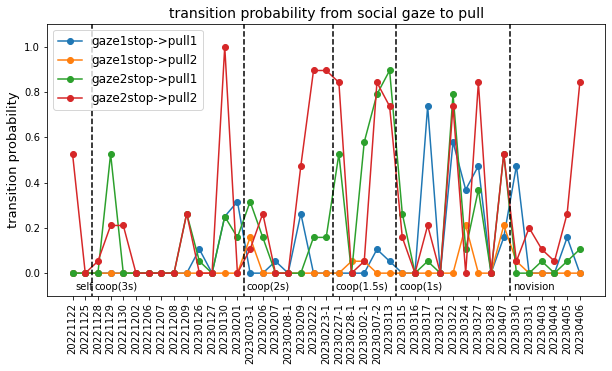

In [17]:
fig, ax1 = plt.subplots(figsize=(10, 5))
#
# sort the data based on task type, coorpthre and dates
# coopthres_forsort = (tasktypes_all_dates)*coopthres_all_dates/2
# coopthres_forsort[coopthres_forsort==0] = 100 # get the cooperation threshold for sorting
# sorting_df = pd.DataFrame({'dates': dates_list, 'coopthres': coopthres_forsort.ravel()}, columns=['dates', 'coopthres'])
# sorting_df = sorting_df.sort_values(by=['coopthres','dates'], ascending = [False, True])
sorting_df = pd.DataFrame({'dates':dates_list,'tasktype':tasktypes_all_dates.ravel(),
                           'coopthres':coopthres_all_dates.ravel()}, columns=['dates','tasktype','coopthres'])
sorting_df = sorting_df.sort_values(by=['tasktype','coopthres','dates'], ascending = [True,False,True])
#
ax1.plot(DAGs_all_dates[sorting_df.index,4,0],'o-',label = "gaze1stop->pull1")
ax1.plot(DAGs_all_dates[sorting_df.index,4,1],'o-',label = "gaze1stop->pull2")
ax1.plot(DAGs_all_dates[sorting_df.index,5,0],'o-',label = "gaze2stop->pull1")
ax1.plot(DAGs_all_dates[sorting_df.index,5,1],'o-',label = "gaze2stop->pull2")
ax1.legend(fontsize=12)
ax1.set_ylim(-0.1,1.1)
ax1.set_ylabel("transition probability",fontsize=13)
#
plt.xticks(np.arange(0,ndates,1),np.array(dates_list)[sorting_df.index], rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.title("transition probability from social gaze to pull", fontsize = 14)
#
tasktypes = ['self','coop(3s)','coop(2s)','coop(1.5s)','coop(1s)','novision']
taskswitches = np.where((np.array(sorting_df['coopthres'])[1:]-np.array(sorting_df['coopthres'])[:-1]!=0)|
                        (np.array(sorting_df['tasktype'])[1:]-np.array(sorting_df['tasktype'])[:-1]!=0))[0]+0.5
for itaskswitch in np.arange(0,np.shape(taskswitches)[0],1):
    taskswitch = taskswitches[itaskswitch]
    ax1.plot([taskswitch,taskswitch],[-0.15,1.15],'k--')
taskswitches = np.concatenate(([0],taskswitches))
for itaskswitch in np.arange(0,np.shape(taskswitches)[0],1):
    taskswitch = taskswitches[itaskswitch]
    ax1.text(taskswitch+0.25,-0.075,tasktypes[itaskswitch],fontsize=10)
#
plt.show()

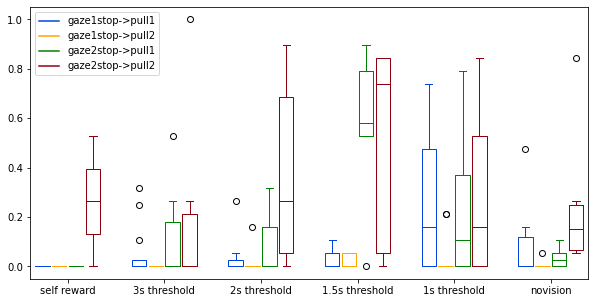

In [18]:
fig, ax1 = plt.subplots(figsize=(10, 5))

grouptypes = ['self reward','3s threshold','2s threshold','1.5s threshold','1s threshold', 'novision']

gaze1_pull1 = [DAGs_all_dates[np.transpose((coopthres_all_dates==0)&(tasktypes_all_dates==1))[0],4,0],
               DAGs_all_dates[np.transpose((coopthres_all_dates==3)&(tasktypes_all_dates==3))[0],4,0],
               DAGs_all_dates[np.transpose((coopthres_all_dates==2)&(tasktypes_all_dates==3))[0],4,0],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1.5)&(tasktypes_all_dates==3))[0],4,0],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1)&(tasktypes_all_dates==3))[0],4,0],
               DAGs_all_dates[np.transpose((tasktypes_all_dates==5))[0],4,0]
              ]
gaze1_pull2 = [DAGs_all_dates[np.transpose((coopthres_all_dates==0)&(tasktypes_all_dates==1))[0],4,1],
               DAGs_all_dates[np.transpose((coopthres_all_dates==3)&(tasktypes_all_dates==3))[0],4,1],
               DAGs_all_dates[np.transpose((coopthres_all_dates==2)&(tasktypes_all_dates==3))[0],4,1],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1.5)&(tasktypes_all_dates==3))[0],4,1],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1)&(tasktypes_all_dates==3))[0],4,1],
               DAGs_all_dates[np.transpose((tasktypes_all_dates==5))[0],4,1]
              ]
gaze2_pull1 = [DAGs_all_dates[np.transpose((coopthres_all_dates==0)&(tasktypes_all_dates==1))[0],5,0],
               DAGs_all_dates[np.transpose((coopthres_all_dates==3)&(tasktypes_all_dates==3))[0],5,0],
               DAGs_all_dates[np.transpose((coopthres_all_dates==2)&(tasktypes_all_dates==3))[0],5,0],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1.5)&(tasktypes_all_dates==3))[0],5,0],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1)&(tasktypes_all_dates==3))[0],5,0],
               DAGs_all_dates[np.transpose((tasktypes_all_dates==5))[0],5,0]
              ]
gaze2_pull2 = [DAGs_all_dates[np.transpose((coopthres_all_dates==0)&(tasktypes_all_dates==1))[0],5,1],
               DAGs_all_dates[np.transpose((coopthres_all_dates==3)&(tasktypes_all_dates==3))[0],5,1],
               DAGs_all_dates[np.transpose((coopthres_all_dates==2)&(tasktypes_all_dates==3))[0],5,1],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1.5)&(tasktypes_all_dates==3))[0],5,1],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1)&(tasktypes_all_dates==3))[0],5,1],
               DAGs_all_dates[np.transpose((tasktypes_all_dates==5))[0],5,1]
              ]
gaze1_pull1_plot = plt.boxplot(gaze1_pull1,positions=np.array(np.arange(len(gaze1_pull1)))*4.0-1.05,widths=0.6)
gaze1_pull2_plot = plt.boxplot(gaze1_pull2,positions=np.array(np.arange(len(gaze1_pull2)))*4.0-0.35,widths=0.6)
gaze2_pull1_plot = plt.boxplot(gaze2_pull1,positions=np.array(np.arange(len(gaze2_pull1)))*4.0+0.35,widths=0.6)
gaze2_pull2_plot = plt.boxplot(gaze2_pull2,positions=np.array(np.arange(len(gaze2_pull2)))*4.0+1.05,widths=0.6)
#
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
    plt.plot([], c=color_code, label=label)
    plt.legend()
#
define_box_properties(gaze1_pull1_plot, '#0343DF', 'gaze1stop->pull1')
define_box_properties(gaze1_pull2_plot, '#FFA500', 'gaze1stop->pull2')
define_box_properties(gaze2_pull1_plot, '#008000', 'gaze2stop->pull1')
define_box_properties(gaze2_pull2_plot, '#8C000F', 'gaze2stop->pull2')
#
# set the x label values
plt.xticks(np.arange(0, len(grouptypes)*4, 4), grouptypes);

### plot the transition probability from pull to social gaze

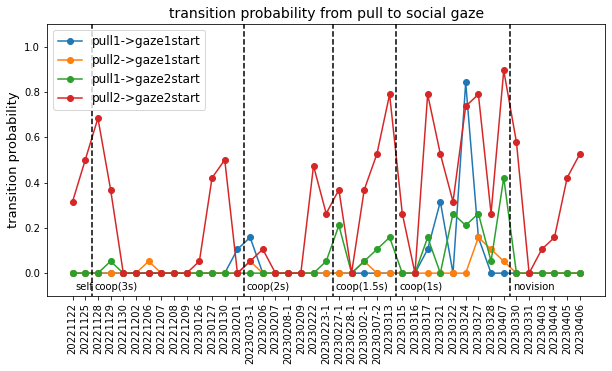

In [19]:
fig, ax1 = plt.subplots(figsize=(10, 5))
#
# sort the data based on task type and dates
sorting_df = pd.DataFrame({'dates':dates_list,'tasktype':tasktypes_all_dates.ravel(),
                           'coopthres':coopthres_all_dates.ravel()}, columns=['dates','tasktype','coopthres'])
sorting_df = sorting_df.sort_values(by=['tasktype','coopthres','dates'], ascending = [True,False,True])
#
ax1.plot(DAGs_all_dates[sorting_df.index,0,2],'o-',label = "pull1->gaze1start")
ax1.plot(DAGs_all_dates[sorting_df.index,1,2],'o-',label = "pull2->gaze1start")
ax1.plot(DAGs_all_dates[sorting_df.index,0,3],'o-',label = "pull1->gaze2start")
ax1.plot(DAGs_all_dates[sorting_df.index,1,3],'o-',label = "pull2->gaze2start")
ax1.legend(fontsize=12)
ax1.set_ylim(-0.1,1.1)
ax1.set_ylabel("transition probability",fontsize=13)
#
plt.xticks(np.arange(0,ndates,1),np.array(dates_list)[sorting_df.index], rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.title("transition probability from pull to social gaze", fontsize = 14)
#
tasktypes = ['self','coop(3s)','coop(2s)','coop(1.5s)','coop(1s)','novision']
taskswitches = np.where((np.array(sorting_df['coopthres'])[1:]-np.array(sorting_df['coopthres'])[:-1]!=0)|
                        (np.array(sorting_df['tasktype'])[1:]-np.array(sorting_df['tasktype'])[:-1]!=0))[0]+0.5
for itaskswitch in np.arange(0,np.shape(taskswitches)[0],1):
    taskswitch = taskswitches[itaskswitch]
    ax1.plot([taskswitch,taskswitch],[-0.15,1.15],'k--')
taskswitches = np.concatenate(([0],taskswitches))
for itaskswitch in np.arange(0,np.shape(taskswitches)[0],1):
    taskswitch = taskswitches[itaskswitch]
    ax1.text(taskswitch+0.25,-0.075,tasktypes[itaskswitch],fontsize=10)
#
plt.show()

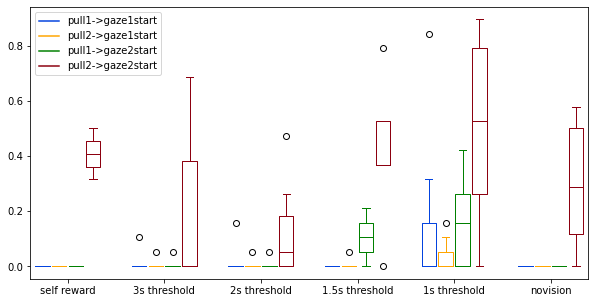

In [20]:
fig, ax1 = plt.subplots(figsize=(10, 5))

grouptypes = ['self reward','3s threshold','2s threshold','1.5s threshold','1s threshold','novision']

pull1_gaze1 = [DAGs_all_dates[np.transpose((coopthres_all_dates==0)&(tasktypes_all_dates==1))[0],0,2],
               DAGs_all_dates[np.transpose((coopthres_all_dates==3)&(tasktypes_all_dates==3))[0],0,2],
               DAGs_all_dates[np.transpose((coopthres_all_dates==2)&(tasktypes_all_dates==3))[0],0,2],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1.5)&(tasktypes_all_dates==3))[0],0,2],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1)&(tasktypes_all_dates==3))[0],0,2],
               DAGs_all_dates[np.transpose((tasktypes_all_dates==5))[0],0,2]
              ]
pull2_gaze1 = [DAGs_all_dates[np.transpose((coopthres_all_dates==0)&(tasktypes_all_dates==1))[0],1,2],
               DAGs_all_dates[np.transpose((coopthres_all_dates==3)&(tasktypes_all_dates==3))[0],1,2],
               DAGs_all_dates[np.transpose((coopthres_all_dates==2)&(tasktypes_all_dates==3))[0],1,2],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1.5)&(tasktypes_all_dates==3))[0],1,2],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1)&(tasktypes_all_dates==3))[0],1,2],
               DAGs_all_dates[np.transpose((tasktypes_all_dates==5))[0],1,2]
              ]
pull1_gaze2 = [DAGs_all_dates[np.transpose((coopthres_all_dates==0)&(tasktypes_all_dates==1))[0],0,3],
               DAGs_all_dates[np.transpose((coopthres_all_dates==3)&(tasktypes_all_dates==3))[0],0,3],
               DAGs_all_dates[np.transpose((coopthres_all_dates==2)&(tasktypes_all_dates==3))[0],0,3],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1.5)&(tasktypes_all_dates==3))[0],0,3],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1)&(tasktypes_all_dates==3))[0],0,3],
               DAGs_all_dates[np.transpose((tasktypes_all_dates==5))[0],0,3]
              ]
pull2_gaze2 = [DAGs_all_dates[np.transpose((coopthres_all_dates==0)&(tasktypes_all_dates==1))[0],1,3],
               DAGs_all_dates[np.transpose((coopthres_all_dates==3)&(tasktypes_all_dates==3))[0],1,3],
               DAGs_all_dates[np.transpose((coopthres_all_dates==2)&(tasktypes_all_dates==3))[0],1,3],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1.5)&(tasktypes_all_dates==3))[0],1,3],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1)&(tasktypes_all_dates==3))[0],1,3],
               DAGs_all_dates[np.transpose((tasktypes_all_dates==5))[0],1,3] 
              ]
pull1_gaze1_plot = plt.boxplot(pull1_gaze1,positions=np.array(np.arange(len(pull1_gaze1)))*4.0-1.05,widths=0.6)
pull2_gaze1_plot = plt.boxplot(pull2_gaze1,positions=np.array(np.arange(len(pull2_gaze1)))*4.0-0.35,widths=0.6)
pull1_gaze2_plot = plt.boxplot(pull1_gaze2,positions=np.array(np.arange(len(pull1_gaze2)))*4.0+0.35,widths=0.6)
pull2_gaze2_plot = plt.boxplot(pull2_gaze2,positions=np.array(np.arange(len(pull2_gaze2)))*4.0+1.05,widths=0.6)
#
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
    plt.plot([], c=color_code, label=label)
    plt.legend()
#
define_box_properties(pull1_gaze1_plot, '#0343DF', 'pull1->gaze1start')
define_box_properties(pull2_gaze1_plot, '#FFA500', 'pull2->gaze1start')
define_box_properties(pull1_gaze2_plot, '#008000', 'pull1->gaze2start')
define_box_properties(pull2_gaze2_plot, '#8C000F', 'pull2->gaze2start')
#
#
# set the x label values
plt.xticks(np.arange(0, len(grouptypes)*4, 4), grouptypes);

### plot the transition probability from pull to pull

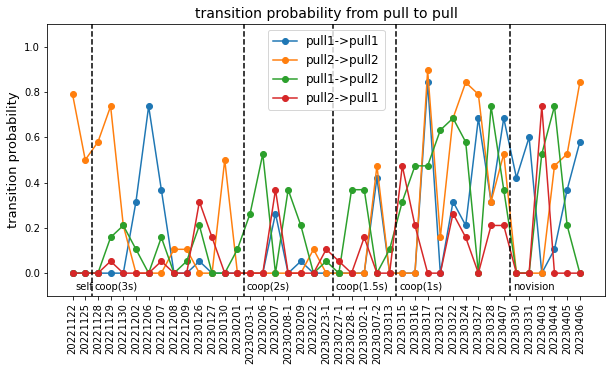

In [21]:
fig, ax1 = plt.subplots(figsize=(10, 5))
#
# sort the data based on task type and dates
sorting_df = pd.DataFrame({'dates':dates_list,'tasktype':tasktypes_all_dates.ravel(),
                           'coopthres':coopthres_all_dates.ravel()}, columns=['dates','tasktype','coopthres'])
sorting_df = sorting_df.sort_values(by=['tasktype','coopthres','dates'], ascending = [True,False,True])
#
ax1.plot(DAGs_all_dates[sorting_df.index,0,0],'o-',label = "pull1->pull1")
ax1.plot(DAGs_all_dates[sorting_df.index,1,1],'o-',label = "pull2->pull2")
ax1.plot(DAGs_all_dates[sorting_df.index,0,1],'o-',label = "pull1->pull2")
ax1.plot(DAGs_all_dates[sorting_df.index,1,0],'o-',label = "pull2->pull1")
ax1.legend(fontsize=12)
ax1.set_ylim(-0.1,1.1)
ax1.set_ylabel("transition probability",fontsize=13)
#
plt.xticks(np.arange(0,ndates,1),np.array(dates_list)[sorting_df.index], rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.title("transition probability from pull to pull", fontsize = 14)
#
tasktypes = ['self','coop(3s)','coop(2s)','coop(1.5s)','coop(1s)','novision']
taskswitches = np.where((np.array(sorting_df['coopthres'])[1:]-np.array(sorting_df['coopthres'])[:-1]!=0)|
                        (np.array(sorting_df['tasktype'])[1:]-np.array(sorting_df['tasktype'])[:-1]!=0))[0]+0.5
for itaskswitch in np.arange(0,np.shape(taskswitches)[0],1):
    taskswitch = taskswitches[itaskswitch]
    ax1.plot([taskswitch,taskswitch],[-0.15,1.15],'k--')
taskswitches = np.concatenate(([0],taskswitches))
for itaskswitch in np.arange(0,np.shape(taskswitches)[0],1):
    taskswitch = taskswitches[itaskswitch]
    ax1.text(taskswitch+0.25,-0.075,tasktypes[itaskswitch],fontsize=10)
#
plt.show()

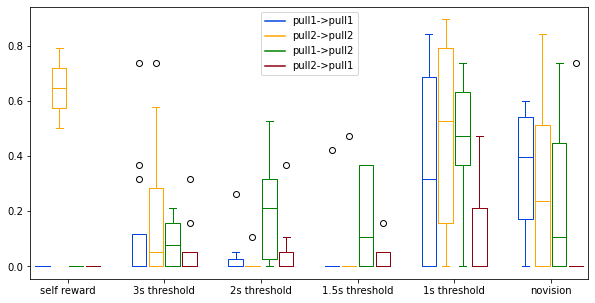

In [22]:
fig, ax1 = plt.subplots(figsize=(10, 5))

grouptypes = ['self reward','3s threshold','2s threshold','1.5s threshold','1s threshold','novision']

pull1_pull1 = [DAGs_all_dates[np.transpose((coopthres_all_dates==0)&(tasktypes_all_dates==1))[0],0,0],
               DAGs_all_dates[np.transpose((coopthres_all_dates==3)&(tasktypes_all_dates==3))[0],0,0],
               DAGs_all_dates[np.transpose((coopthres_all_dates==2)&(tasktypes_all_dates==3))[0],0,0],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1.5)&(tasktypes_all_dates==3))[0],0,0],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1)&(tasktypes_all_dates==3))[0],0,0],
               DAGs_all_dates[np.transpose((tasktypes_all_dates==5))[0],0,0]
              ]
pull2_pull2 = [DAGs_all_dates[np.transpose((coopthres_all_dates==0)&(tasktypes_all_dates==1))[0],1,1],
               DAGs_all_dates[np.transpose((coopthres_all_dates==3)&(tasktypes_all_dates==3))[0],1,1],
               DAGs_all_dates[np.transpose((coopthres_all_dates==2)&(tasktypes_all_dates==3))[0],1,1],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1.5)&(tasktypes_all_dates==3))[0],1,1],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1)&(tasktypes_all_dates==3))[0],1,1],
               DAGs_all_dates[np.transpose((tasktypes_all_dates==5))[0],1,1]
              ]
pull1_pull2 = [DAGs_all_dates[np.transpose((coopthres_all_dates==0)&(tasktypes_all_dates==1))[0],0,1],
               DAGs_all_dates[np.transpose((coopthres_all_dates==3)&(tasktypes_all_dates==3))[0],0,1],
               DAGs_all_dates[np.transpose((coopthres_all_dates==2)&(tasktypes_all_dates==3))[0],0,1],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1.5)&(tasktypes_all_dates==3))[0],0,1],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1)&(tasktypes_all_dates==3))[0],0,1],
               DAGs_all_dates[np.transpose((tasktypes_all_dates==5))[0],0,1]
              ]
pull2_pull1 = [DAGs_all_dates[np.transpose((coopthres_all_dates==0)&(tasktypes_all_dates==1))[0],1,0],
               DAGs_all_dates[np.transpose((coopthres_all_dates==3)&(tasktypes_all_dates==3))[0],1,0],
               DAGs_all_dates[np.transpose((coopthres_all_dates==2)&(tasktypes_all_dates==3))[0],1,0],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1.5)&(tasktypes_all_dates==3))[0],1,0],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1)&(tasktypes_all_dates==3))[0],1,0],
               DAGs_all_dates[np.transpose((tasktypes_all_dates==5))[0],1,0]
              ]
pull1_pull1_plot = plt.boxplot(pull1_pull1,positions=np.array(np.arange(len(gaze1_pull1)))*4.0-1.05,widths=0.6)
pull2_pull2_plot = plt.boxplot(pull2_pull2,positions=np.array(np.arange(len(gaze1_pull2)))*4.0-0.35,widths=0.6)
pull1_pull2_plot = plt.boxplot(pull1_pull2,positions=np.array(np.arange(len(gaze2_pull1)))*4.0+0.35,widths=0.6)
pull2_pull1_plot = plt.boxplot(pull2_pull1,positions=np.array(np.arange(len(gaze2_pull2)))*4.0+1.05,widths=0.6)
#
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
    plt.plot([], c=color_code, label=label)
    plt.legend()
#
define_box_properties(pull1_pull1_plot, '#0343DF', 'pull1->pull1')
define_box_properties(pull2_pull2_plot, '#FFA500', 'pull2->pull2')
define_box_properties(pull1_pull2_plot, '#008000', 'pull1->pull2')
define_box_properties(pull2_pull1_plot, '#8C000F', 'pull2->pull1')
#
# set the x label values
plt.xticks(np.arange(0, len(grouptypes)*4, 4), grouptypes);

### plot the transition probability from social gaze to social gaze

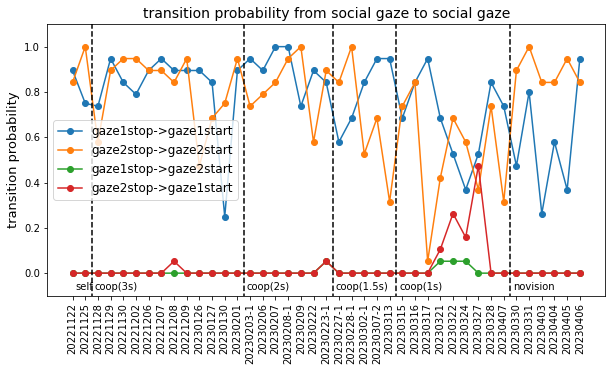

In [23]:
fig, ax1 = plt.subplots(figsize=(10, 5))
#
# sort the data based on task type and dates
sorting_df = pd.DataFrame({'dates':dates_list,'tasktype':tasktypes_all_dates.ravel(),
                           'coopthres':coopthres_all_dates.ravel()}, columns=['dates','tasktype','coopthres'])
sorting_df = sorting_df.sort_values(by=['tasktype','coopthres','dates'], ascending = [True,False,True])
#
ax1.plot(DAGs_all_dates[sorting_df.index,4,2],'o-',label = "gaze1stop->gaze1start")
ax1.plot(DAGs_all_dates[sorting_df.index,5,3],'o-',label = "gaze2stop->gaze2start")
ax1.plot(DAGs_all_dates[sorting_df.index,4,3],'o-',label = "gaze1stop->gaze2start")
ax1.plot(DAGs_all_dates[sorting_df.index,5,2],'o-',label = "gaze2stop->gaze1start")
ax1.legend(fontsize=12)
ax1.set_ylim(-0.1,1.1)
ax1.set_ylabel("transition probability",fontsize=13)
#
plt.xticks(np.arange(0,ndates,1),np.array(dates_list)[sorting_df.index], rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.title("transition probability from social gaze to social gaze", fontsize = 14)
#
tasktypes = ['self','coop(3s)','coop(2s)','coop(1.5s)','coop(1s)','novision']
taskswitches = np.where((np.array(sorting_df['coopthres'])[1:]-np.array(sorting_df['coopthres'])[:-1]!=0)|
                        (np.array(sorting_df['tasktype'])[1:]-np.array(sorting_df['tasktype'])[:-1]!=0))[0]+0.5
for itaskswitch in np.arange(0,np.shape(taskswitches)[0],1):
    taskswitch = taskswitches[itaskswitch]
    ax1.plot([taskswitch,taskswitch],[-0.15,1.15],'k--')
taskswitches = np.concatenate(([0],taskswitches))
for itaskswitch in np.arange(0,np.shape(taskswitches)[0],1):
    taskswitch = taskswitches[itaskswitch]
    ax1.text(taskswitch+0.25,-0.075,tasktypes[itaskswitch],fontsize=10)
#
plt.show()

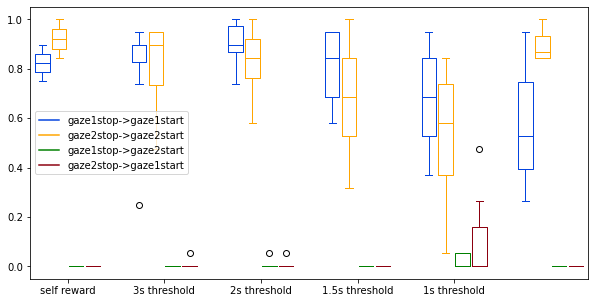

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 5))

grouptypes = ['self reward','3s threshold','2s threshold','1.5s threshold','1s threshold']

gaze1_gaze1 = [DAGs_all_dates[np.transpose((coopthres_all_dates==0)&(tasktypes_all_dates==1))[0],4,2],
               DAGs_all_dates[np.transpose((coopthres_all_dates==3)&(tasktypes_all_dates==3))[0],4,2],
               DAGs_all_dates[np.transpose((coopthres_all_dates==2)&(tasktypes_all_dates==3))[0],4,2],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1.5)&(tasktypes_all_dates==3))[0],4,2],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1)&(tasktypes_all_dates==3))[0],4,2],
               DAGs_all_dates[np.transpose((tasktypes_all_dates==5))[0],4,2]
              ]
gaze2_gaze2 = [DAGs_all_dates[np.transpose((coopthres_all_dates==0)&(tasktypes_all_dates==1))[0],5,3],
               DAGs_all_dates[np.transpose((coopthres_all_dates==3)&(tasktypes_all_dates==3))[0],5,3],
               DAGs_all_dates[np.transpose((coopthres_all_dates==2)&(tasktypes_all_dates==3))[0],5,3],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1.5)&(tasktypes_all_dates==3))[0],5,3],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1)&(tasktypes_all_dates==3))[0],5,3],
               DAGs_all_dates[np.transpose((tasktypes_all_dates==5))[0],5,3]
              ]
gaze1_gaze2 = [DAGs_all_dates[np.transpose((coopthres_all_dates==0)&(tasktypes_all_dates==1))[0],4,3],
               DAGs_all_dates[np.transpose((coopthres_all_dates==3)&(tasktypes_all_dates==3))[0],4,3],
               DAGs_all_dates[np.transpose((coopthres_all_dates==2)&(tasktypes_all_dates==3))[0],4,3],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1.5)&(tasktypes_all_dates==3))[0],4,3],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1)&(tasktypes_all_dates==3))[0],4,3],
               DAGs_all_dates[np.transpose((tasktypes_all_dates==5))[0],4,3]
              ]
gaze2_gaze1 = [DAGs_all_dates[np.transpose((coopthres_all_dates==0)&(tasktypes_all_dates==1))[0],5,2],
               DAGs_all_dates[np.transpose((coopthres_all_dates==3)&(tasktypes_all_dates==3))[0],5,2],
               DAGs_all_dates[np.transpose((coopthres_all_dates==2)&(tasktypes_all_dates==3))[0],5,2],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1.5)&(tasktypes_all_dates==3))[0],5,2],
               DAGs_all_dates[np.transpose((coopthres_all_dates==1)&(tasktypes_all_dates==3))[0],5,2],
               DAGs_all_dates[np.transpose((tasktypes_all_dates==5))[0],5,2]
              ]
gaze1_gaze1_plot = plt.boxplot(gaze1_gaze1,positions=np.array(np.arange(len(gaze1_gaze1)))*4.0-1.05,widths=0.6)
gaze2_gaze2_plot = plt.boxplot(gaze2_gaze2,positions=np.array(np.arange(len(gaze2_gaze2)))*4.0-0.35,widths=0.6)
gaze1_gaze2_plot = plt.boxplot(gaze1_gaze2,positions=np.array(np.arange(len(gaze1_gaze2)))*4.0+0.35,widths=0.6)
gaze2_gaze1_plot = plt.boxplot(gaze2_gaze1,positions=np.array(np.arange(len(gaze2_gaze1)))*4.0+1.05,widths=0.6)
#
def define_box_properties(plot_name, color_code, label):
    for k, v in plot_name.items():
        plt.setp(plot_name.get(k), color=color_code)
    plt.plot([], c=color_code, label=label)
    plt.legend()
#
define_box_properties(gaze1_gaze1_plot, '#0343DF', 'gaze1stop->gaze1start')
define_box_properties(gaze2_gaze2_plot, '#FFA500', 'gaze2stop->gaze2start')
define_box_properties(gaze1_gaze2_plot, '#008000', 'gaze1stop->gaze2start')
define_box_properties(gaze2_gaze1_plot, '#8C000F', 'gaze2stop->gaze1start')
#
# set the x label values
plt.xticks(np.arange(0, len(grouptypes)*4, 4), grouptypes);

### plot between behavioral measures - successful rate vs interpull interval

Text(2, 1, 'corr r = -0.13; corr p = 0.43')

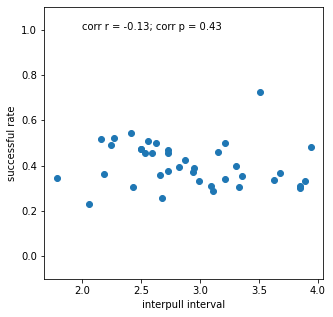

In [25]:
fig, axs = plt.subplots(1,1,figsize=(5, 5))

# ind = (tasktypes_all_dates != 1) & (coopthres_all_dates == 1)
ind = (tasktypes_all_dates != 1) 
#
xxx = interpullintv_all_dates[ind]
yyy = succ_rate_all_dates[ind]
axs.plot(xxx,yyy,'o')
axs.set_xlabel('interpull interval')
axs.set_ylabel('successful rate')
# axs.set_xlim([-0.1,1.1])
axs.set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy)
axs.text(2, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))

### sanity check: plot the pull transition probability vs behavioral measures - successful rate

Text(0, 1, 'corr r = 0.06; corr p = 0.63')

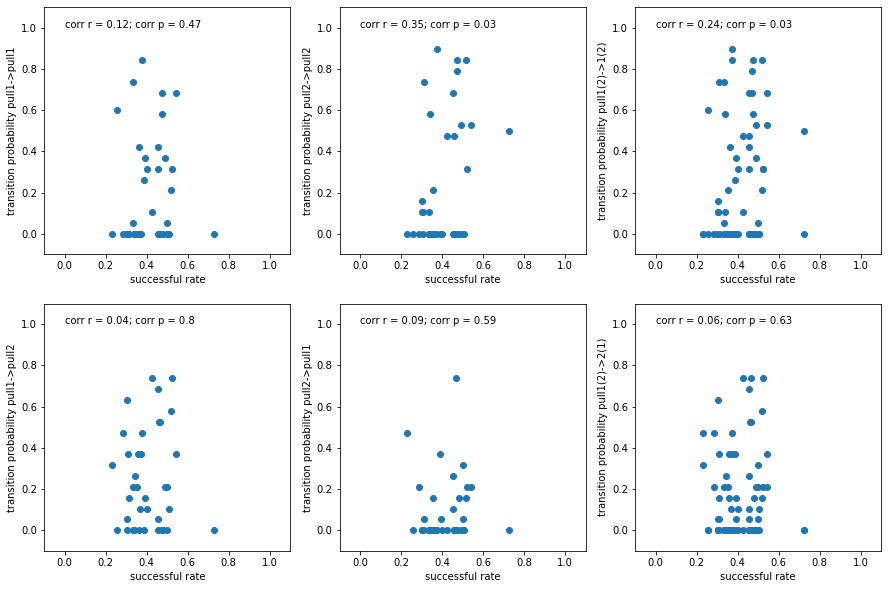

In [26]:
fig, axs = plt.subplots(2,3,figsize=(15, 10))

# ind = (tasktypes_all_dates != 1) & (succ_rate_all_dates*trialnum_all_dates > 20)
# ind = (tasktypes_all_dates != 1) & (interpullintv_all_dates < 10)
# ind = (tasktypes_all_dates != 1) & (coopthres_all_dates == 1)
ind = (tasktypes_all_dates != 1)
#
xxx  = succ_rate_all_dates[ind]
yyy1 = DAGs_all_dates[np.transpose(ind)[0],0,0]
y1label = "pull1->pull1"
yyy2 = DAGs_all_dates[np.transpose(ind)[0],1,1]
y2label = "pull2->pull2"
yyy3 = DAGs_all_dates[np.transpose(ind)[0],0,1]
y3label = "pull1->pull2"
yyy4 = DAGs_all_dates[np.transpose(ind)[0],1,0]
y4label = "pull2->pull1"
#
axs[0,0].plot(xxx,yyy1,'o')
axs[0,0].set_xlabel('successful rate')
axs[0,0].set_ylabel('transition probability '+y1label)
axs[0,0].set_xlim([-0.1,1.1])
axs[0,0].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy1)
axs[0,0].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[0,1].plot(xxx,yyy2,'o')
axs[0,1].set_xlabel('successful rate')
axs[0,1].set_ylabel('transition probability '+y2label)
axs[0,1].set_xlim([-0.1,1.1])
axs[0,1].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy2)
axs[0,1].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[1,0].plot(xxx,yyy3,'o')
axs[1,0].set_xlabel('successful rate')
axs[1,0].set_ylabel('transition probability '+y3label)
axs[1,0].set_xlim([-0.1,1.1])
axs[1,0].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy3)
axs[1,0].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[1,1].plot(xxx,yyy4,'o')
axs[1,1].set_xlabel('successful rate')
axs[1,1].set_ylabel('transition probability '+y4label)
axs[1,1].set_xlim([-0.1,1.1])
axs[1,1].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy4)
axs[1,1].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[0,2].plot(np.concatenate((xxx, xxx)),np.concatenate((yyy1, yyy2)),'o')
axs[0,2].set_xlabel('successful rate')
axs[0,2].set_ylabel('transition probability pull1(2)->1(2)')
axs[0,2].set_xlim([-0.1,1.1])
axs[0,2].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(np.concatenate((xxx, xxx)),np.concatenate((yyy1, yyy2)))
axs[0,2].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[1,2].plot(np.concatenate((xxx, xxx)),np.concatenate((yyy3, yyy4)),'o')
axs[1,2].set_xlabel('successful rate')
axs[1,2].set_ylabel('transition probability pull1(2)->2(1)')
axs[1,2].set_xlim([-0.1,1.1])
axs[1,2].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(np.concatenate((xxx, xxx)),np.concatenate((yyy3, yyy4)))
axs[1,2].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))

### sanity check: plot the pull transition probability vs behavioral measures - interpull interval

Text(2, 1, 'corr r = -0.29; corr p = 0.01')

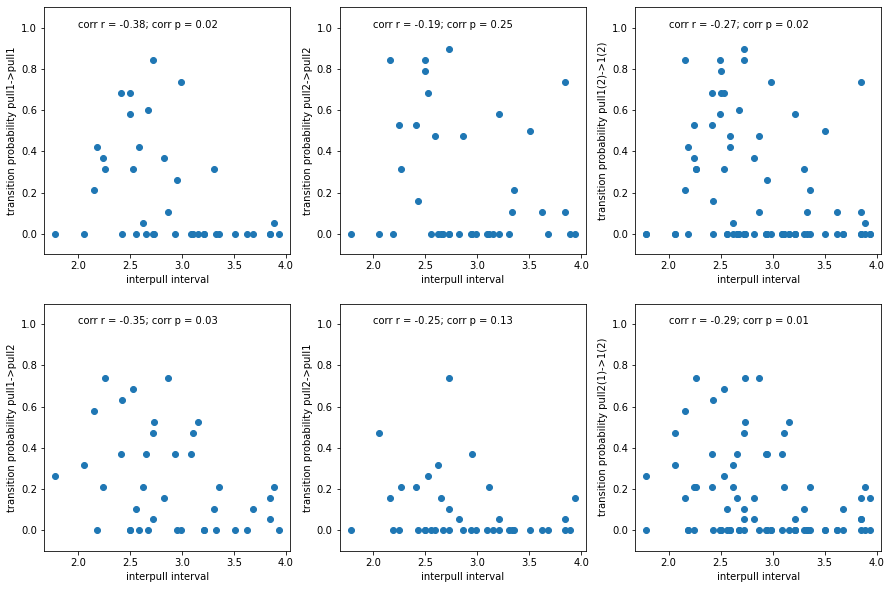

In [30]:
fig, axs = plt.subplots(2,3,figsize=(15, 10))

# ind = (tasktypes_all_dates != 1) & (succ_rate_all_dates*trialnum_all_dates > 20)
# ind = (tasktypes_all_dates != 1) & (interpullintv_all_dates < 10)
# ind = (tasktypes_all_dates != 1) & (coopthres_all_dates == 1)
ind = (tasktypes_all_dates != 1) 
#
xxx  = interpullintv_all_dates[ind]
yyy1 = DAGs_all_dates[np.transpose(ind)[0],0,0]
y1label = "pull1->pull1"
yyy2 = DAGs_all_dates[np.transpose(ind)[0],1,1]
y2label = "pull2->pull2"
yyy3 = DAGs_all_dates[np.transpose(ind)[0],0,1]
y3label = "pull1->pull2"
yyy4 = DAGs_all_dates[np.transpose(ind)[0],1,0]
y4label = "pull2->pull1"
#
axs[0,0].plot(xxx,yyy1,'o')
axs[0,0].set_xlabel('interpull interval')
axs[0,0].set_ylabel('transition probability '+y1label)
#axs[0,0].set_xlim([-0.1,1.1])
axs[0,0].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy1)
axs[0,0].text(2, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[0,1].plot(xxx,yyy2,'o')
axs[0,1].set_xlabel('interpull interval')
axs[0,1].set_ylabel('transition probability '+y2label)
#axs[0,1].set_xlim([-0.1,1.1])
axs[0,1].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy2)
axs[0,1].text(2, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[1,0].plot(xxx,yyy3,'o')
axs[1,0].set_xlabel('interpull interval')
axs[1,0].set_ylabel('transition probability '+y3label)
#axs[1,0].set_xlim([-0.1,1.1])
axs[1,0].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy3)
axs[1,0].text(2, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[1,1].plot(xxx,yyy4,'o')
axs[1,1].set_xlabel('interpull interval')
axs[1,1].set_ylabel('transition probability '+y4label)
#axs[1,1].set_xlim([-0.1,1.1])
axs[1,1].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy4)
axs[1,1].text(2, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[0,2].plot(np.concatenate((xxx, xxx)),np.concatenate((yyy1, yyy2)),'o')
axs[0,2].set_xlabel('interpull interval')
axs[0,2].set_ylabel('transition probability pull1(2)->1(2)')
#axs[0,2].set_xlim([-0.1,1.1])
axs[0,2].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(np.concatenate((xxx, xxx)),np.concatenate((yyy1, yyy2)))
axs[0,2].text(2, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[1,2].plot(np.concatenate((xxx, xxx)),np.concatenate((yyy3, yyy4)),'o')
axs[1,2].set_xlabel('interpull interval')
axs[1,2].set_ylabel('transition probability pull2(1)->1(2)')
#axs[1,2].set_xlim([-0.1,1.1])
axs[1,2].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(np.concatenate((xxx, xxx)),np.concatenate((yyy3, yyy4)))
axs[1,2].text(2, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))

### plot the gaze->pull transition probability vs behavioral measures - successful rate

Text(0, 1, 'corr r = 0.19; corr p = 0.09')

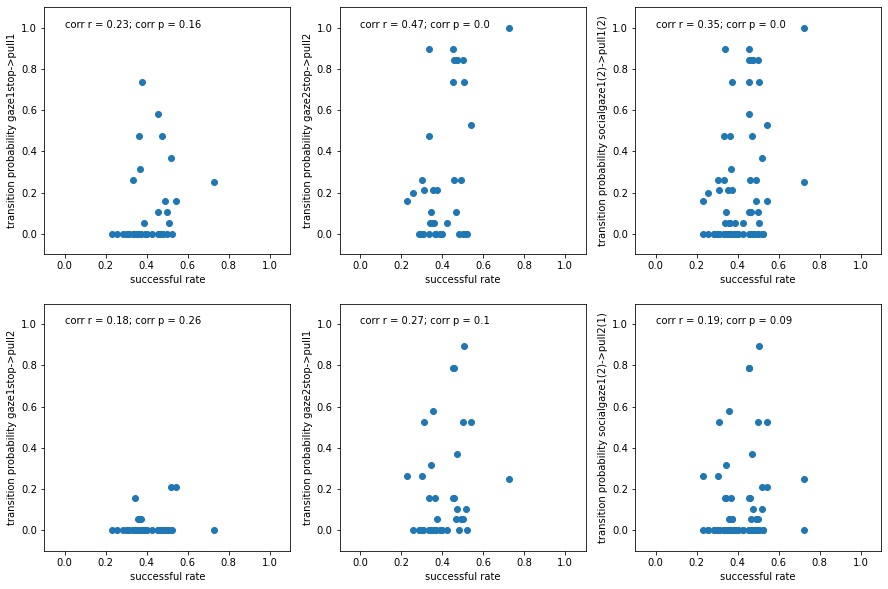

In [31]:
fig, axs = plt.subplots(2,3,figsize=(15, 10))

# ind = (tasktypes_all_dates != 1) & (succ_rate_all_dates*trialnum_all_dates > 20)
# ind = (tasktypes_all_dates != 1) & (interpullintv_all_dates < 10)
# ind = (tasktypes_all_dates != 1) & (coopthres_all_dates == 1)
ind = (tasktypes_all_dates != 1)

xxx  = succ_rate_all_dates[ind]
yyy1 = DAGs_all_dates[np.transpose(ind)[0],4,0]
y1label = "gaze1stop->pull1"
yyy2 = DAGs_all_dates[np.transpose(ind)[0],5,1]
y2label = "gaze2stop->pull2"
yyy3 = DAGs_all_dates[np.transpose(ind)[0],4,1]
y3label = "gaze1stop->pull2"
yyy4 = DAGs_all_dates[np.transpose(ind)[0],5,0]
y4label = "gaze2stop->pull1"

#
axs[0,0].plot(xxx,yyy1,'o')
axs[0,0].set_xlabel('successful rate')
axs[0,0].set_ylabel('transition probability '+y1label)
axs[0,0].set_xlim([-0.1,1.1])
axs[0,0].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy1)
axs[0,0].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[0,1].plot(xxx,yyy2,'o')
axs[0,1].set_xlabel('successful rate')
axs[0,1].set_ylabel('transition probability '+y2label)
axs[0,1].set_xlim([-0.1,1.1])
axs[0,1].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy2)
axs[0,1].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[1,0].plot(xxx,yyy3,'o')
axs[1,0].set_xlabel('successful rate')
axs[1,0].set_ylabel('transition probability '+y3label)
axs[1,0].set_xlim([-0.1,1.1])
axs[1,0].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy3)
axs[1,0].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[1,1].plot(xxx,yyy4,'o')
axs[1,1].set_xlabel('successful rate')
axs[1,1].set_ylabel('transition probability '+y4label)
axs[1,1].set_xlim([-0.1,1.1])
axs[1,1].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy4)
axs[1,1].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[0,2].plot(np.concatenate((xxx, xxx)),np.concatenate((yyy1, yyy2)),'o')
axs[0,2].set_xlabel('successful rate')
axs[0,2].set_ylabel('transition probability socialgaze1(2)->pull1(2)')
axs[0,2].set_xlim([-0.1,1.1])
axs[0,2].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(np.concatenate((xxx, xxx)),np.concatenate((yyy1, yyy2)))
axs[0,2].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[1,2].plot(np.concatenate((xxx, xxx)),np.concatenate((yyy3, yyy4)),'o')
axs[1,2].set_xlabel('successful rate')
axs[1,2].set_ylabel('transition probability socialgaze1(2)->pull2(1)')
axs[1,2].set_xlim([-0.1,1.1])
axs[1,2].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(np.concatenate((xxx, xxx)),np.concatenate((yyy3, yyy4)))
axs[1,2].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))

### plot the pull -> gaze transition probability vs behavioral measures - successful rate

Text(0, 1, 'corr r = 0.3; corr p = 0.01')

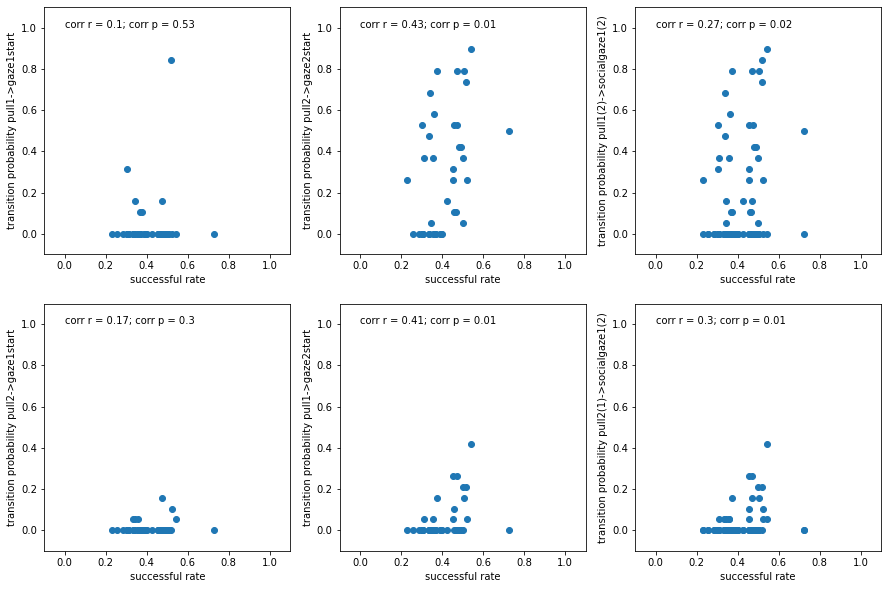

In [32]:
fig, axs = plt.subplots(2,3,figsize=(15, 10))

# ind = (tasktypes_all_dates != 1) & (succ_rate_all_dates*trialnum_all_dates > 20)
# ind = (tasktypes_all_dates != 1) & (interpullintv_all_dates < 10)
# ind = (tasktypes_all_dates != 1) & (coopthres_all_dates == 1)
ind = (tasktypes_all_dates != 1)

xxx  = succ_rate_all_dates[ind]
yyy1 = DAGs_all_dates[np.transpose(ind)[0],0,2]
y1label = "pull1->gaze1start"
yyy2 = DAGs_all_dates[np.transpose(ind)[0],1,3]
y2label = "pull2->gaze2start"
yyy3 = DAGs_all_dates[np.transpose(ind)[0],1,2]
y3label = "pull2->gaze1start"
yyy4 = DAGs_all_dates[np.transpose(ind)[0],0,3]
y4label = "pull1->gaze2start"

#
axs[0,0].plot(xxx,yyy1,'o')
axs[0,0].set_xlabel('successful rate')
axs[0,0].set_ylabel('transition probability '+y1label)
axs[0,0].set_xlim([-0.1,1.1])
axs[0,0].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy1)
axs[0,0].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[0,1].plot(xxx,yyy2,'o')
axs[0,1].set_xlabel('successful rate')
axs[0,1].set_ylabel('transition probability '+y2label)
axs[0,1].set_xlim([-0.1,1.1])
axs[0,1].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy2)
axs[0,1].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[1,0].plot(xxx,yyy3,'o')
axs[1,0].set_xlabel('successful rate')
axs[1,0].set_ylabel('transition probability '+y3label)
axs[1,0].set_xlim([-0.1,1.1])
axs[1,0].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy3)
axs[1,0].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[1,1].plot(xxx,yyy4,'o')
axs[1,1].set_xlabel('successful rate')
axs[1,1].set_ylabel('transition probability '+y4label)
axs[1,1].set_xlim([-0.1,1.1])
axs[1,1].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy4)
axs[1,1].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[0,2].plot(np.concatenate((xxx, xxx)),np.concatenate((yyy1, yyy2)),'o')
axs[0,2].set_xlabel('successful rate')
axs[0,2].set_ylabel('transition probability pull1(2)->socialgaze1(2)')
axs[0,2].set_xlim([-0.1,1.1])
axs[0,2].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(np.concatenate((xxx, xxx)),np.concatenate((yyy1, yyy2)))
axs[0,2].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[1,2].plot(np.concatenate((xxx, xxx)),np.concatenate((yyy3, yyy4)),'o')
axs[1,2].set_xlabel('successful rate')
axs[1,2].set_ylabel('transition probability pull2(1)->socialgaze1(2)')
axs[1,2].set_xlim([-0.1,1.1])
axs[1,2].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(np.concatenate((xxx, xxx)),np.concatenate((yyy3, yyy4)))
axs[1,2].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))

### plot the gaze -> gaze transition probability vs behavioral measures - successful rate

Text(0, 1, 'corr r = 0.11; corr p = 0.33')

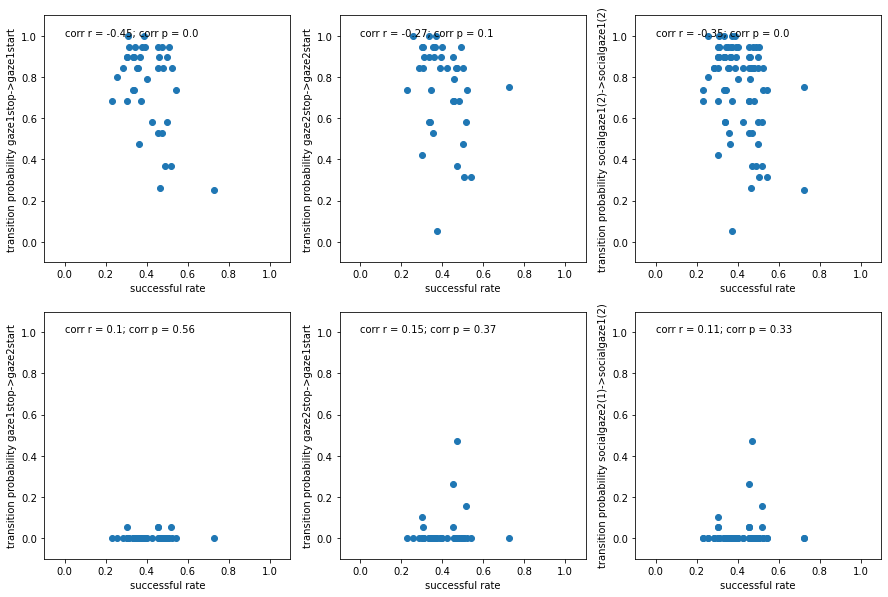

In [33]:
fig, axs = plt.subplots(2,3,figsize=(15, 10))

# ind = (tasktypes_all_dates != 1) & (succ_rate_all_dates*trialnum_all_dates > 20)
# ind = (tasktypes_all_dates != 1) & (interpullintv_all_dates < 10)
# ind = (tasktypes_all_dates != 1) & (coopthres_all_dates == 1)
ind = (tasktypes_all_dates != 1)

xxx  = succ_rate_all_dates[ind]
yyy1 = DAGs_all_dates[np.transpose(ind)[0],4,2]
y1label = "gaze1stop->gaze1start"
yyy2 = DAGs_all_dates[np.transpose(ind)[0],5,3]
y2label = "gaze2stop->gaze2start"
yyy3 = DAGs_all_dates[np.transpose(ind)[0],4,3]
y3label = "gaze1stop->gaze2start"
yyy4 = DAGs_all_dates[np.transpose(ind)[0],5,2]
y4label = "gaze2stop->gaze1start"

#
axs[0,0].plot(xxx,yyy1,'o')
axs[0,0].set_xlabel('successful rate')
axs[0,0].set_ylabel('transition probability '+y1label)
axs[0,0].set_xlim([-0.1,1.1])
axs[0,0].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy1)
axs[0,0].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[0,1].plot(xxx,yyy2,'o')
axs[0,1].set_xlabel('successful rate')
axs[0,1].set_ylabel('transition probability '+y2label)
axs[0,1].set_xlim([-0.1,1.1])
axs[0,1].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy2)
axs[0,1].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[1,0].plot(xxx,yyy3,'o')
axs[1,0].set_xlabel('successful rate')
axs[1,0].set_ylabel('transition probability '+y3label)
axs[1,0].set_xlim([-0.1,1.1])
axs[1,0].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy3)
axs[1,0].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[1,1].plot(xxx,yyy4,'o')
axs[1,1].set_xlabel('successful rate')
axs[1,1].set_ylabel('transition probability '+y4label)
axs[1,1].set_xlim([-0.1,1.1])
axs[1,1].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy4)
axs[1,1].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[0,2].plot(np.concatenate((xxx, xxx)),np.concatenate((yyy1, yyy2)),'o')
axs[0,2].set_xlabel('successful rate')
axs[0,2].set_ylabel('transition probability socialgaze1(2)->socialgaze1(2)')
axs[0,2].set_xlim([-0.1,1.1])
axs[0,2].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(np.concatenate((xxx, xxx)),np.concatenate((yyy1, yyy2)))
axs[0,2].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[1,2].plot(np.concatenate((xxx, xxx)),np.concatenate((yyy3, yyy4)),'o')
axs[1,2].set_xlabel('successful rate')
axs[1,2].set_ylabel('transition probability socialgaze2(1)->socialgaze1(2)')
axs[1,2].set_xlim([-0.1,1.1])
axs[1,2].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(np.concatenate((xxx, xxx)),np.concatenate((yyy3, yyy4)))
axs[1,2].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))

### plot the gaze->pull transition probability vs gaze/pull ratio

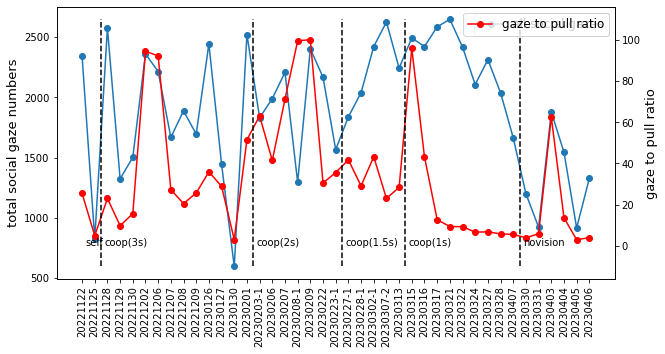

In [46]:
#
# sort the data based on task type and dates
sorting_df = pd.DataFrame({'dates':dates_list,'tasktype':tasktypes_all_dates.ravel(),
                           'coopthres':coopthres_all_dates.ravel()}, columns=['dates','tasktype','coopthres'])
sorting_df = sorting_df.sort_values(by=['tasktype','coopthres','dates'], ascending = [True,False,True])

gaze_numbers = (owgaze1_num_all_dates+owgaze2_num_all_dates+mtgaze1_num_all_dates+mtgaze2_num_all_dates)
gaze_pull_ratios = (owgaze1_num_all_dates+owgaze2_num_all_dates+mtgaze1_num_all_dates+mtgaze2_num_all_dates)/(pull1_num_all_dates+pull2_num_all_dates)

fig, ax1 = plt.subplots(figsize=(10, 5))
#
ax1.plot(gaze_numbers[sorting_df.index],'o-',label = "all social gazes")

ax1.legend(fontsize=12)
ax1.set_ylabel("total social gaze numbers",fontsize=13)
#
plt.xticks(np.arange(0,ndates,1),np.array(dates_list)[sorting_df.index], rotation=90,fontsize=10)
plt.yticks(fontsize=10)
#
ax2 = ax1.twinx()
ax2.plot(gaze_pull_ratios[sorting_df.index],'ro-',label = "gaze to pull ratio")
ax2.legend(fontsize=12)
ax2.set_ylabel("gaze to pull ratio",fontsize=13)
#
#
tasktypes = ['self','coop(3s)','coop(2s)','coop(1.5s)','coop(1s)','novision']
taskswitches = np.where((np.array(sorting_df['coopthres'])[1:]-np.array(sorting_df['coopthres'])[:-1]!=0)|
                        (np.array(sorting_df['tasktype'])[1:]-np.array(sorting_df['tasktype'])[:-1]!=0))[0]+0.5
for itaskswitch in np.arange(0,np.shape(taskswitches)[0],1):
    taskswitch = taskswitches[itaskswitch]
    ax2.plot([taskswitch,taskswitch],[-10,110],'k--')
taskswitches = np.concatenate(([0],taskswitches))
for itaskswitch in np.arange(0,np.shape(taskswitches)[0],1):
    taskswitch = taskswitches[itaskswitch]
    ax2.text(taskswitch+0.25,-0.075,tasktypes[itaskswitch],fontsize=10)
plt.show()

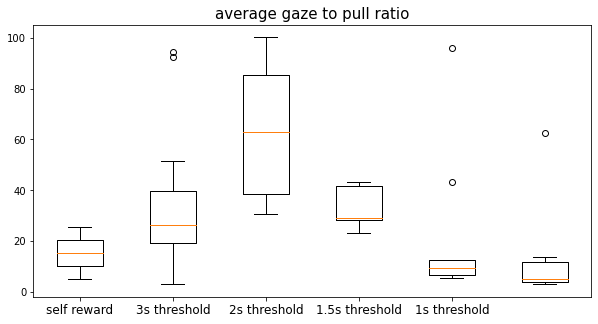

In [39]:
gaze_numbers = (owgaze1_num_all_dates+owgaze2_num_all_dates+mtgaze1_num_all_dates+mtgaze2_num_all_dates)
gaze_pull_ratios = (owgaze1_num_all_dates+owgaze2_num_all_dates+mtgaze1_num_all_dates+mtgaze2_num_all_dates)/(pull1_num_all_dates+pull2_num_all_dates)

fig, ax1 = plt.subplots(figsize=(10, 5))

grouptypes = ['self reward','3s threshold','2s threshold','1.5s threshold','1s threshold']

gaze_numbers_groups = [np.transpose(gaze_pull_ratios[np.transpose((coopthres_all_dates==0)&(tasktypes_all_dates==1))[0]])[0],
                       np.transpose(gaze_pull_ratios[np.transpose((coopthres_all_dates==3)&(tasktypes_all_dates==3))[0]])[0],
                       np.transpose(gaze_pull_ratios[np.transpose((coopthres_all_dates==2)&(tasktypes_all_dates==3))[0]])[0],
                       np.transpose(gaze_pull_ratios[np.transpose((coopthres_all_dates==1.5)&(tasktypes_all_dates==3))[0]])[0],
                       np.transpose(gaze_pull_ratios[np.transpose((coopthres_all_dates==1)&(tasktypes_all_dates==3))[0]])[0],
                       np.transpose(gaze_pull_ratios[np.transpose((coopthres_all_dates==1)&(tasktypes_all_dates==5))[0]])[0]
       
                      ]

gaze_numbers_plot = plt.boxplot(gaze_numbers_groups)

plt.xticks(np.arange(1, len(grouptypes)+1, 1), grouptypes, fontsize = 12);
plt.title('average gaze to pull ratio',fontsize = 15);

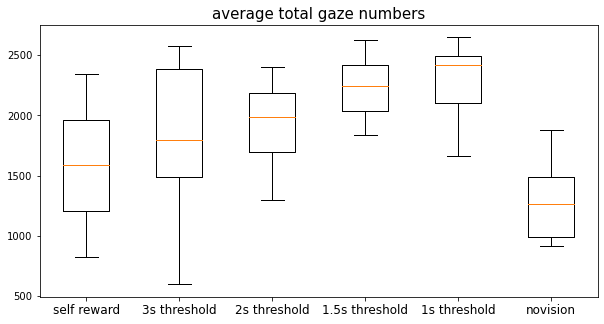

In [38]:
gaze_numbers = (owgaze1_num_all_dates+owgaze2_num_all_dates+mtgaze1_num_all_dates+mtgaze2_num_all_dates)
gaze_pull_ratios = (owgaze1_num_all_dates+owgaze2_num_all_dates+mtgaze1_num_all_dates+mtgaze2_num_all_dates)/(pull1_num_all_dates+pull2_num_all_dates)

fig, ax1 = plt.subplots(figsize=(10, 5))

grouptypes = ['self reward','3s threshold','2s threshold','1.5s threshold','1s threshold','novision']

gaze_numbers_groups = [np.transpose(gaze_numbers[np.transpose((coopthres_all_dates==0)&(tasktypes_all_dates==1))[0]])[0],
                       np.transpose(gaze_numbers[np.transpose((coopthres_all_dates==3)&(tasktypes_all_dates==3))[0]])[0],
                       np.transpose(gaze_numbers[np.transpose((coopthres_all_dates==2)&(tasktypes_all_dates==3))[0]])[0],
                       np.transpose(gaze_numbers[np.transpose((coopthres_all_dates==1.5)&(tasktypes_all_dates==3))[0]])[0],
                       np.transpose(gaze_numbers[np.transpose((coopthres_all_dates==1)&(tasktypes_all_dates==3))[0]])[0],
                       np.transpose(gaze_numbers[np.transpose((tasktypes_all_dates==5))[0]])[0]
                      ]

gaze_numbers_plot = plt.boxplot(gaze_numbers_groups)

plt.xticks(np.arange(1, len(grouptypes)+1, 1), grouptypes, fontsize = 12);
plt.title('average total gaze numbers',fontsize = 15);

Text(0, 1, 'corr r = 0.19; corr p = 0.09')

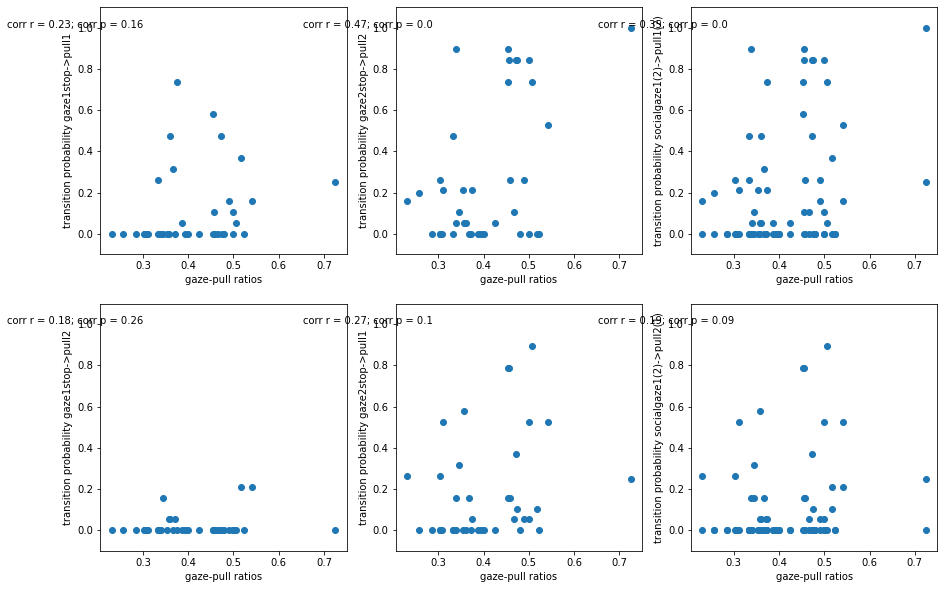

In [42]:
gaze_pull_ratios = (owgaze1_num_all_dates+owgaze2_num_all_dates+mtgaze1_num_all_dates+mtgaze2_num_all_dates)/(pull1_num_all_dates+pull2_num_all_dates)
# gaze_pull_ratios = (owgaze1_num_all_dates+owgaze2_num_all_dates+mtgaze1_num_all_dates+mtgaze2_num_all_dates)
fig, axs = plt.subplots(2,3,figsize=(15, 10))

# ind = (tasktypes_all_dates != 1) & (succ_rate_all_dates*trialnum_all_dates > 20)
# ind = (tasktypes_all_dates != 1) & (interpullintv_all_dates < 10)
# ind = (tasktypes_all_dates != 1) & (coopthres_all_dates == 1)
ind = (tasktypes_all_dates != 1)

xxx  = succ_rate_all_dates[ind]
yyy1 = DAGs_all_dates[np.transpose(ind)[0],4,0]
y1label = "gaze1stop->pull1"
yyy2 = DAGs_all_dates[np.transpose(ind)[0],5,1]
y2label = "gaze2stop->pull2"
yyy3 = DAGs_all_dates[np.transpose(ind)[0],4,1]
y3label = "gaze1stop->pull2"
yyy4 = DAGs_all_dates[np.transpose(ind)[0],5,0]
y4label = "gaze2stop->pull1"

#
axs[0,0].plot(xxx,yyy1,'o')
axs[0,0].set_xlabel('gaze-pull ratios')
axs[0,0].set_ylabel('transition probability '+y1label)
# axs[0,0].set_xlim([-0.1,1.1])
axs[0,0].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy1)
axs[0,0].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[0,1].plot(xxx,yyy2,'o')
axs[0,1].set_xlabel('gaze-pull ratios')
axs[0,1].set_ylabel('transition probability '+y2label)
# axs[0,1].set_xlim([-0.1,1.1])
axs[0,1].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy2)
axs[0,1].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[1,0].plot(xxx,yyy3,'o')
axs[1,0].set_xlabel('gaze-pull ratios')
axs[1,0].set_ylabel('transition probability '+y3label)
# axs[1,0].set_xlim([-0.1,1.1])
axs[1,0].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy3)
axs[1,0].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[1,1].plot(xxx,yyy4,'o')
axs[1,1].set_xlabel('gaze-pull ratios')
axs[1,1].set_ylabel('transition probability '+y4label)
# axs[1,1].set_xlim([-0.1,1.1])
axs[1,1].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(xxx,yyy4)
axs[1,1].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[0,2].plot(np.concatenate((xxx, xxx)),np.concatenate((yyy1, yyy2)),'o')
axs[0,2].set_xlabel('gaze-pull ratios')
axs[0,2].set_ylabel('transition probability socialgaze1(2)->pull1(2)')
# axs[0,2].set_xlim([-0.1,1.1])
axs[0,2].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(np.concatenate((xxx, xxx)),np.concatenate((yyy1, yyy2)))
axs[0,2].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))
#
axs[1,2].plot(np.concatenate((xxx, xxx)),np.concatenate((yyy3, yyy4)),'o')
axs[1,2].set_xlabel('gaze-pull ratios')
axs[1,2].set_ylabel('transition probability socialgaze1(2)->pull2(1)')
# axs[1,2].set_xlim([-0.1,1.1])
axs[1,2].set_ylim([-0.1,1.1])
r,p = scipy.stats.pearsonr(np.concatenate((xxx, xxx)),np.concatenate((yyy3, yyy4)))
axs[1,2].text(0, 1, 'corr r = '+str(np.round(r,2))+'; '+'corr p = '+str(np.round(p,2)))


